<a href="https://colab.research.google.com/github/markus-weiss/AVGAN/blob/master/AVGAN_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREINSTALLING

In [4]:
!pip install tensorflow-gpu==2.0.0-beta0

     |████████████████████████████████| 348.9MB 60kB/s 
     |████████████████████████████████| 3.1MB 19.7MB/s 
     |████████████████████████████████| 501kB 32.5MB/s 


In [5]:
!pip install imageio

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
# Change Directory to your Script
cd /content/drive/My Drive/Colab Notebooks/AVGAN/

/content/drive/My Drive/Colab Notebooks/AVGAN


In [8]:
!ls



audio_input	       _AVGAN_Versions		    image_input_3
audio_output	       complete_output_at_0001.png  image_output
_AVGAN_1-3TrainResult  _GIF_OUTPUT		    training_checkpoints
AVGAN_7.2.ipynb        image_input


# IMPORTS

In [0]:
import tensorflow as tf
tf.__version__

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import matplotlib.image as mpimg
from IPython import display

#IMAGE READ IN and define DISCRIMINATOR

## DataReadIn Image

In [10]:
def GetListOfFiles(dirName):
  # create a list of file and sub directories 
  # names in the given directory 
  listOfFile = os.listdir(dirName)
  allFiles = list()
  # Iterate over all the entries
  for entry in listOfFile:
      # Create full path
      fullPath = os.path.join(dirName, entry)
      # If entry is a directory then get the list of files in this directory 
      if os.path.isdir(fullPath):
          allFiles = allFiles + getListOfFiles(fullPath)
      else:
          allFiles.append(fullPath)

  return allFiles

def ImageReadIn(image_list):
  image_array = [len(image_list),600,800,3]
  for item in image_list:
    import cv2 
    image = cv2.imread(item)
    reshaped_image = image
    image_array[0] = image

  return image_array

def ConvertToTensor(image_list, image_count):
  import numpy as np
  ndarray = np.ones([image_count,600,800,3])

  ndarray[0,:,:,:] = image_list[0]

  n=0
  for item in image_list:
    ndarray[n,:,:,:] = image_list[n]
    n=n+1

  # TO CHECK THAT THE DATA IS RIGHT
  #print(ndarray[:,0,0,0])

  # CONVERT A NUMPY ARRAY TO A TENSOR
  img_tensor = tf.add(ndarray, 1)
  tensor_reshape = tf.image.resize(img_tensor, [224, 224])

  return tf.convert_to_tensor(tensor_reshape, np.float32)


  
  
  
image_data_root = "image_input_3/"
image_list = GetListOfFiles(image_data_root)

print(image_list)

image_data_array = ImageReadIn(image_list)

image_count = len(image_list)
#print(image_count)
image_dataset = ConvertToTensor(image_data_array,image_count)

print(image_dataset.shape)




['image_input_3/2019-01-18T08_23_23.724Z.jpg', 'image_input_3/2019-01-18T08_23_23.724Z (1).jpg', 'image_input_3/2019-01-18T08_28_04.262Z.jpg', 'image_input_3/2019-01-18T08_28_04.262Z (2).jpg']
(4, 224, 224, 3)


##Define IMAGE convolution

In [11]:
def discriminator_Image():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(32, (3,3), strides = (1,1), padding = 'same', input_shape= [224,224,3]))
  model.add(layers.LeakyReLU())


  model.add(layers.MaxPooling2D(2, 2))
  model.add(layers.Conv2D(64, (3,3), strides = (1,1), padding = 'same'))
  model.add(layers.LeakyReLU())
  
  model.add(layers.MaxPooling2D(2, 2))
  model.add(layers.Conv2D(128, (3,3), strides = (1,1), padding = 'same'))
  model.add(layers.LeakyReLU())
  model.add(layers.MaxPooling2D(2, 2))
  for layer in model.layers:
    aA=layer.output_shape
    bA=layer.output
    #print(aA)
    #print(bA)
  
  return model



discriminator_image = discriminator_Image()
discriminator_image(image_dataset)


<tf.Tensor: id=131, shape=(4, 28, 28, 128), dtype=float32, numpy=
array([[[[ 3.56708641e+01,  2.62438774e+01,  3.79651546e+00, ...,
           2.97112160e+01, -1.41321659e+00, -2.42038178e+00],
         [ 3.24871140e+01,  2.56907368e+01,  1.23062944e+01, ...,
           2.15450249e+01, -9.23505485e-01, -3.54892540e+00],
         [ 3.23548698e+01,  2.55362778e+01,  1.23238764e+01, ...,
           2.15330219e+01, -9.33187187e-01, -3.50046349e+00],
         ...,
         [ 2.43988991e+01,  2.51026878e+01,  3.84727597e+00, ...,
           1.81393681e+01, -9.62259471e-01, -3.00609350e+00],
         [ 2.56194496e+01,  2.49520206e+01,  4.41356277e+00, ...,
           1.85026360e+01, -9.87610340e-01, -3.06540418e+00],
         [ 2.82399197e+01,  2.33689003e+01,  5.55563450e+00, ...,
           3.12667274e+01,  1.78840542e+00, -9.62695360e-01]],

        [[ 2.83459816e+01,  2.52445278e+01,  1.81143522e-01, ...,
           2.77939415e+01, -3.52043748e+00, -9.05649281e+00],
         [ 2.71970425e

#AUDIO READ IN and define DISCRIMINATOR

In [0]:
# Here we need the function that converts Wave to images 

##Read Files and Concatenate
Pleaseremember that every file with the same number will be concatenate

In [12]:
def getListOfFiles(dirName):
  # create a list of file and sub directories 
  # names in the given directory 
  listOfFile = os.listdir(dirName)
  allFiles = list()
  # Iterate over all the entries
  for entry in listOfFile:
      # Create full path
      fullPath = os.path.join(dirName, entry)
      # If entry is a directory then get the list of files in this directory 
      if os.path.isdir(fullPath):
          allFiles = allFiles + getListOfFiles(fullPath)
      else:
          allFiles.append(fullPath)

  return allFiles
  
  
# Not stable is pre alpha cause when the pictures not directly inumeratet 
# [102. 150. 102.   3.] this output is not good but if you print out the data concat read in you find the error but why
# for item in audioList:
#  print(item)


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

  
def From6to2Dimensions(log,phase):
   
  log = rgb2gray(log) 
  phase = rgb2gray(phase) 

  reshapeAudioImage = np.ndarray((224,224,2))
  reshapeAudioImage[:,:,0] = log[:,:]
  reshapeAudioImage[:,:,1] = phase[:,:]
  
  return reshapeAudioImage
  



def ConcatAllPairsInFolder(audiolist):
  n = 1
  concatAudioImage = [len(audioList)/2,224,224,6]
  for item in audioList:
    #print(n)

    import re
    r = re.compile('.*_' + str(n) +'.jpg')
    pair = list(filter(r.match, audioList)) # Read Note
    #print(pair[0]," ",pair[1])
    #print(pair)
    

    import cv2 
    log     = cv2.imread(pair[0])  
    phase   = cv2.imread(pair[1])

    
    
    #import tensorflow as tf
    # dimension 2 IS RIGHT ????
    #LogPhaseCon = tf.concat([log,phase],2)
    #print(LogPhaseCon)

    concatAudioImage[n-1] = From6to2Dimensions(log,phase)
    


    if n >= len(audioList)/2:
      return concatAudioImage
      break
    else:
      n=n+1
      


def ConvertToTensor(concatImageAudioList, audioimageCount):
  import numpy as np
  ndarray = np.ones([audioimageCount,224,224,2])
  
  # Convert color to grey 6 - 2 channel

  ndarray[0,:,:,:] = concatImageAudioList[0]

  n=0
  for item in concatImageAudioList:
    ndarray[n,:,:,:] = concatImageAudioList[n]
    n=n+1

  # TO CHECK THAT THE DATA IS RIGHT
  #print(ndarray[:,0,0,0])

  # CONVERT A NUMPY ARRAY TO A TENSOR
  tensor = tf.add(ndarray, 1)
  #print(tensor.shape)
  #print(tensor[3])


  #tf.convert_to_tensor([ndarray, 1, 1, 64])
  return tf.convert_to_tensor(ndarray, np.float32)
  #type(data_tf)
  #sess = tf.compat.v1.InteractiveSession()
  #print(data_tf.numpy())
  #sess.close()

  

audioFolder = 'audio_input/'
audioList = getListOfFiles(audioFolder)

concatImageAudioList = ConcatAllPairsInFolder(audioList)
#print(concatImageAudioList)




audioimageCount = len(concatImageAudioList)
data_tf = ConvertToTensor(concatImageAudioList,audioimageCount)

 
audioImage_dataSet = data_tf
print(audioImage_dataSet.shape)
type(audioImage_dataSet)




(4, 224, 224, 2)


tensorflow.python.framework.ops.EagerTensor

##Define AUDIO Convolution


In [13]:

def discriminator_Audio():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(32, (3,3), strides = (1,1), padding = 'same', input_shape= [224,224,2]))
  model.add(layers.LeakyReLU())

  model.add(layers.MaxPooling2D(2, 2))
  model.add(layers.Conv2D(64, (3,3), strides = (1,1), padding = 'same'))
  model.add(layers.LeakyReLU())
  
  model.add(layers.MaxPooling2D(2, 2))
  model.add(layers.Conv2D(128, (3,3), strides = (1,1), padding = 'same'))
  model.add(layers.LeakyReLU())
  model.add(layers.MaxPooling2D(2, 2))
  for layer in model.layers:
    aA=layer.output_shape
    bA=layer.output
    #print(aA)
    #print(bA)
  
  return model



discriminator_audio = discriminator_Audio()
discriminator_audio(audioImage_dataSet)

<tf.Tensor: id=260, shape=(4, 28, 28, 128), dtype=float32, numpy=
array([[[[-0.16719475, -1.8148965 , -0.9187167 , ..., -0.41803616,
           8.948854  ,  9.361895  ],
         [ 1.8813474 , -1.1519593 , -0.8757272 , ..., -0.7382955 ,
           5.775492  ,  4.802819  ],
         [ 1.9273419 , -1.1251168 , -0.8556239 , ..., -0.74622   ,
           5.738511  ,  4.6556683 ],
         ...,
         [ 1.9566345 , -1.2149076 , -0.987089  , ..., -0.78581685,
           5.6825256 ,  4.7877574 ],
         [ 1.9846731 , -1.2093303 , -0.94142735, ..., -0.7534993 ,
           5.699684  ,  4.8854795 ],
         [ 1.4390252 , -0.3931781 , -0.7856674 , ..., -0.03361051,
           4.8417187 , 10.1800995 ]],

        [[ 2.0214288 , -1.1789691 , -1.3172276 , ..., -0.37642312,
           7.27404   ,  9.809053  ],
         [ 2.594878  , -0.675712  , -1.3019868 , ..., -0.9657056 ,
           2.443986  ,  3.682392  ],
         [ 2.616006  , -0.6720295 , -1.2869139 , ..., -0.9690094 ,
           2.268038

#FINAL DISCRIMINATOR 

##Discriminator concatenation

In [14]:
image_conv = discriminator_image(image_dataset)
audio_conv = discriminator_audio(audioImage_dataSet)

#print(image_conv[0,0,0,0])
#print(audio_conv[0,0,0,0])


concatenation = tf.concat([image_conv, audio_conv], axis=3)
print(concatenation.shape)
#print(concatenation[0,0,0,128])




(4, 28, 28, 256)


##Define FINAL Discriminator

In [0]:
def Final_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 256]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [16]:
final_discriminator = Final_discriminator_model()
output = final_discriminator(concatenation)
#print (output)
#print(output.shape)

BUFFER_SIZE = 60
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(concatenation).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(train_dataset)



<BatchDataset shapes: (None, 28, 28, 256), types: tf.float32>


# Define **Generator**

In [17]:
import tensorflow as tf
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Concatenate, Dense, LSTM, Flatten, RepeatVector, TimeDistributed, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Bidirectional, GaussianNoise, BatchNormalization
from keras.layers import CuDNNLSTM as LSTM

Using TensorFlow backend.


In [46]:
# Generate to streams in the generator , de concatenation in the generator
# upconv to (None, 28, 28, 256) and the split it in two streams inside 
# resphape an reconcate

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 256)
    
  
    #[ log phase - 224,224,2]
    #[ rgb - 224,224,3]
    
    return model
  
  
  

  
noise = tf.random.normal([1, 100])
generator = make_generator_model()
generated_image = generator(noise, training=False)


generated_image.shape
#plt.imshow(generated_image[0, :, :, 0])


#audioTensor, imageTensor = deConcat(model)
    
  


TensorShape([1, 28, 28, 256])

## Unwrapfunctions deConcat, deconvolutionAudio and Image

In [0]:

def deConcat(model):
   
  deConcatedModelAudio = np.ones([28,28,128])
  deConcatedModelImage = np.ones([28,28,128])
  tensor = model
  #print(tensor.dtype)
  
  split0, split1 = tf.split(tensor, num_or_size_splits=2, axis=3)
  tf.shape(split0)
  tf.shape(split1)

  deConcatedModelAudio = split0
  deConcatedModelImage = split1
  
  #print(deConcatedModelAudio)
  #print(deConcatedModelImage)


  return deConcatedModelAudio , deConcatedModelImage


def deConvolution_Audio():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 128]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU()) 

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 56, 56, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(8, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 112, 112, 8)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())    

    model.add(layers.Conv2DTranspose(2, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 224, 224, 2)

    return model
  
ndarray = np.ones([4,28,28,128])
#print(ndarray[1,1,1,1])
ndarray = tf.cast(ndarray, 'float32')
#print(ndarray.shape)
deConvolution_Audio = deConvolution_Audio()
deConvolution_Audio_Image = deConvolution_Audio(ndarray)
#output.shape

def deConvolution_Image():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 128]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU()) 

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 56, 56, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(8, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 112, 112, 8)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())    

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 224, 224, 3)
    
    return model
  
ndarray = np.ones([4,28,28,128])
#print(ndarray[1,1,1,1])
ndarray = tf.cast(ndarray, 'float32')
#print(ndarray.shape)
deConvolution_Image = deConvolution_Image()
deConvolution_Image_Image = deConvolution_Image(ndarray)
#output.shape
 

#Training Functions

In [0]:
noise_dim = 100
num_examples_to_generate = 1
#decision = Final_discriminator_model(generated_image)
#print (decision)

# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)



def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss
  
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)
  
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=final_discriminator)



# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    print('Training_Step')
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = final_discriminator(images, training=True)
      fake_output = final_discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, final_discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, final_discriminator.trainable_variables))
    
    
def train(dataset, epochs):
  print('Training_Started')
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 500 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)
  





##Save training output

In [0]:
#PUFFER IMAGE EXTERN???  
#pufferImg = np.ndarray((224,224,3))

# ATTENTION: NOT SURE ABOUT [0,:,:,:] -> what does the 0 do ????

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def generate_and_save_images(model, epoch, test_input):
  print('Generate_and_save')
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  #print(predictions.shape)
  
  
  # CONCAT CONVOL
  
  audio_model, image_model = deConcat(predictions)
  
  #print(audio_model.shape, image_model.shape)
  
  audio_output = deConvolution_Audio(audio_model)
  image_output = deConvolution_Image(image_model)
  
  #print('audio_output',audio_output.shape,'image_output',image_output.shape)
  
  
  pufferImg = np.ndarray((224,224,3))
  #pufferImg[:,:,:] = image_output[0,:,:,:] 
  pufferImg = image_output[0,:,:,:]
  pufferImg = pufferImg[:,:,:] 
    
    
  pufferPhase = np.ndarray((224,224))
  pufferLog = np.ndarray((224,224))
  
  pufferPhase[:,:] = audio_output[0,:,:,0]
  pufferLog[:,:] = audio_output[0,:,:,1]
  
  
  plot_size = 4
  
  # IMAGE    
  plt.figure(figsize=(plot_size,plot_size))
  plt.title('RGB-Image')
  plt.imshow((pufferImg))
  #plt.imshow(pufferImg)
  plt.axis('off')
  plt.savefig('./image_output/image_at_epoch_{:04d}.png'.format(epoch))
    
    
  # AUDIO
  ## PHASE
  plt.figure(figsize=(plot_size,plot_size))
  plt.title('PHASE-IMAGE')  
  plt.imshow(pufferPhase, cmap='gray')
  plt.axis('off')
  plt.savefig('./audio_output/phase_at_epoch_{:04d}.png'.format(epoch))

  ## LOG_MAGNITUDE
  plt.figure(figsize=(plot_size,plot_size))
  plt.title('LOG-IMAGE')
  plt.imshow(pufferLog, cmap='gray')
  plt.axis('off')
  plt.savefig('./audio_output/log_at_epoch_{:04d}.png'.format(epoch))
  
  
  plt.show()
  

#TRAINING

In [0]:
EPOCHS = 10

W0724 08:17:50.318728 139719329122176 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Generate_and_save


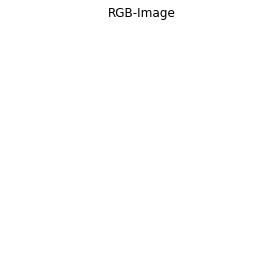

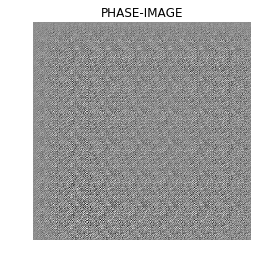

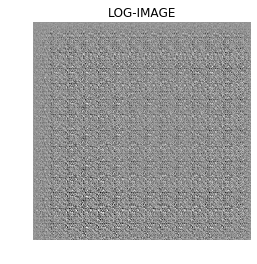

CPU times: user 7.84 s, sys: 3.08 s, total: 10.9 s
Wall time: 10.4 s


In [67]:
%%time
train(train_dataset, EPOCHS)

#After training

In [0]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [0]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('TrainedImages/image_at_epoch_{:04d}.png'.format(epoch_no))

In [0]:
anim_file = 'AVGAN.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  #filenames = glob.glob('image*.png')
  filenames = glob.glob('./image_output/image*.png')
  #filenames = glob.glob('./audio_output/log*.png')
  #filenames = glob.glob('./audio_output/phase*.png')
  
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download(anim_file)